# Building Open Source Geochemical Research Tools in Python

<a href="https://doi.org/10.5281/zenodo.3874952"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.3874952.svg" align="right" alt="doi: 10.5281/zenodo.3875779" style="padding: 0px 10px 10px 0px"></a>
<a href="https://github.com/morganjwilliams/gs2020-python4geochem/blob/master/LICENSE"><img src="https://img.shields.io/badge/License-MIT-blue.svg" align="right" alt="License: MIT" style="padding: 0px 10px 10px 0px"></a>

<span id='authors'><b>Morgan Williams <a class="fa fa-twitter" aria-hidden="true" href="https://twitter.com/metasomite" title="@metasomite"></a></b>, Louise Schoneveld, Steve Barnes and Jens Klump; </span>
<span id='affiliation'><em>CSIRO Mineral Resources</em></span>

### Contents

| [**Abstract**](./00_overview.ipynb) | **Introduction**  | [**Examples**](./01_examples.ipynb)  |
|:-----|:-----|:-----|
|  | [Software in Geochem](./01_intro.ipynb#Software-in-Geochemistry)  |  [pyrolite](./011_pyrolite.ipynb)  |
|  | [Development & Tools](./01_intro.ipynb#Development-Workflow-&-Tools) | [pyrolite-meltsutil](./012_pyrolite-meltsutil.ipynb) | 
|  |  | [interferences](./013_interferences.ipynb) | 
|  |  | [autopew](./014_autopew.ipynb) |  

## interferences

>  Tools for inorganic mass spectra and interference patterns.

[![Docs](https://readthedocs.org/projects/interferences/badge/?version=develop)](https://interferences.readthedocs.io/)

This is an under-development package to facilitate debugging and identification of
issues during method development and analysis of novel samples for geologically-focused
mass spectrometry.

``interferences`` is centred around building tables which contain sets of molecular ions corresponding to a specific set of elements within your analytical target. Building the tables themselves is relatively straightforward. For examples, to build a table of ions which might be expected from Ca, O, Ar and H with a charge of +1 and up to two atoms within a molecule, you could use:

```python
df = build_table(["Ca", "O", "Ar", "H"], charges=[1], max_atoms=2)
```

These tables can then be displayed graphically, with a rudimentary estimate of relative abundance shown. Currently, ``interferences`` has two such methods, ``stemplot`` and ``spectra``. The first simply illustates the relative position of peaks (in m/z), while the second attempts to represent the width of some of these mass peaks given a specified mass resolution.

In [1]:
import pandas as pd
from interferences.table import build_table
import matplotlib.pyplot as plt
from pyrolite.geochem.ind import REE

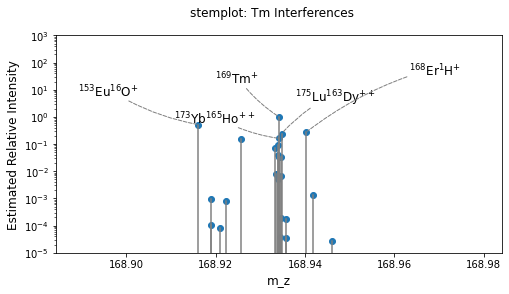

In [2]:
window = ("Tm[169]", 0.1)
df = build_table(REE() + ["O", "N", "H"], window=window, max_atoms=2)
ax = df.mz.stemplot(window=window, max_labels=5, figsize=(8, 4))
ax.figure.suptitle('stemplot: Tm Interferences')
plt.show()

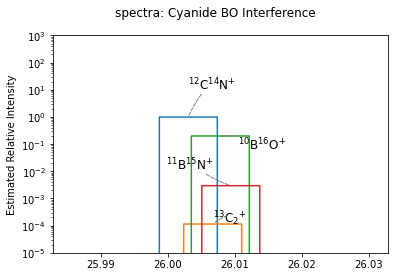

In [3]:
window = ("B[10]O[16]", 0.05)
df = build_table(["C", "B", "N", "O"], window=window, max_atoms=2)
ax = df.mz.spectra(window=window, mass_resolution=3000, max_labels=5, figsize=(8, 4))
ax.figure.suptitle('spectra: Cyanide BO Interference')
plt.show()

We've included an interactive example below, if you'd like to play around with some of these without getting into the code itself. Note that it takes a second or two to run and refresh on these servers.

In [4]:
import ipywidgets as widgets
interact_manual = widgets.interact.options(manual=True, manual_name="Build Plot")

def plot_function(mode='stem', elements=[],window1=None, window2=0.05, max_atoms=2, max_charge=2, mass_resolution=3000,image_ratio=0):
    elements = [el.strip() for el in elements.split(',')]
    window = (window1, window2)
    df = build_table(elements, window=window, max_atoms=max_atoms, charges=[i+1 for i in range(max_charge)])
    if 'stem' in mode:
        ax = df.mz.stemplot(window=window, max_labels=5, figsize=(8, 4))
    else:
        ax = df.mz.spectra(window=window, mass_resolution=mass_resolution,image_ratio=image_ratio, max_labels=5, figsize=(8, 4))
    

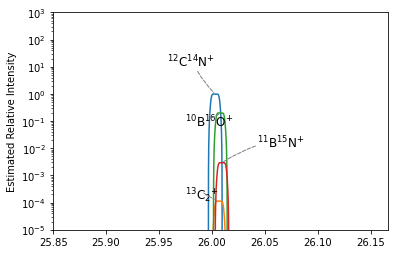

Output(layout=Layout(height='350px'))

In [7]:
mode= widgets.ToggleButtons(options=['spectra','stemplot'], value='spectra', description='Mode:')
elements=widgets.Text(value="C,B,N,O",description='Elements:')
max_atoms=widgets.IntSlider(min=1, max=3, step=1, value=2, description='Atoms:')
max_charge=widgets.IntSlider(min=1, max=3, step=1, value=2, description='Max Charge:')
window1=widgets.Text(value="B[10]O[16]", description='Target:')
window2=widgets.FloatLogSlider(min=-2, max=-0.5, step=0.1, description='Width')
mass_resolution=widgets.IntSlider(min=500, max=10000, step=1000, value=3000, description='Resolution:')
image_ratio = widgets.FloatSlider(min=0, max=1.5, step=0.1, value=0.5, description='Image Ratio:')

ui = widgets.HBox([widgets.VBox([mode, elements, max_atoms, max_charge]), widgets.VBox([window1, window2, mass_resolution, image_ratio])])

out = widgets.interactive_output(plot_function, {'mode': mode, 
                                     'elements': elements, 
                                     'max_atoms': max_atoms,
                                     'max_charge': max_charge, 
                                     'window1': window1, 
                                     'window2': window2,
                                     'mass_resolution': mass_resolution,
                                     'image_ratio' :image_ratio
                                })
out.layout.height = '350px'

display(ui, out)

If you're interested in seeing some more of this, check out the [documentation](https://interferences.readthedocs.io/) or [repository](https://github.com/morganjwilliams/interferences).

-----

| [**Abstract**](./00_overview.ipynb) | **Introduction**  | [**Examples**](./01_examples.ipynb)  |
|:-----|:-----|:-----|
|  | [Software in Geochem](./01_intro.ipynb#Software-in-Geochemistry)  |  [pyrolite](./011_pyrolite.ipynb)  |
|  | [Development & Tools](./01_intro.ipynb#Development-Workflow-&-Tools) | [pyrolite-meltsutil](./012_pyrolite-meltsutil.ipynb) | 
|  |  | [interferences](./013_interferences.ipynb) | 
|  |  | [autopew](./014_autopew.ipynb) | 